In [37]:
%matplotlib inline
import numpy as np
import pandas as pd
from hagelslag.evaluation import DistributedROC, DistributedReliability
from hagelslag.evaluation.MetricPlotter import roc_curve, performance_diagram, attributes_diagram
from hagelslag.data import ModelOutput
from IPython.display import Image
import os
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from netCDF4 import Dataset

In [2]:
merged_path = "/glade/scratch/dgagne/track_forecasts_ncar_2016_merged/"
track_files = sorted(os.listdir(merged_path))
merged_data = {}
members = []
for track_file in track_files:
    print(track_file)
    member = track_file.split("_")[4]
    members.append(member)
    merged_data[member] = pd.read_csv(merged_path + track_file)

track_forecast_data_NCAR_mem10_combined.csv
track_forecast_data_NCAR_mem1_combined.csv
track_forecast_data_NCAR_mem2_combined.csv
track_forecast_data_NCAR_mem3_combined.csv
track_forecast_data_NCAR_mem4_combined.csv
track_forecast_data_NCAR_mem5_combined.csv
track_forecast_data_NCAR_mem6_combined.csv
track_forecast_data_NCAR_mem7_combined.csv
track_forecast_data_NCAR_mem8_combined.csv
track_forecast_data_NCAR_mem9_combined.csv


In [5]:
merged_data["mem1"]["Date"]

AttributeError: 'Series' object has no attribute 'month'

In [11]:
day1_data = {}
for mem in merged_data.keys():
    fh = merged_data[mem]["Forecast_Hour"]
    date = pd.DatetimeIndex(merged_data[mem]["Date"])
    day1_data[mem] = merged_data[mem].loc[(fh >= 13) & (fh <=36) & (date.month > 4) & (date.month < 7)]

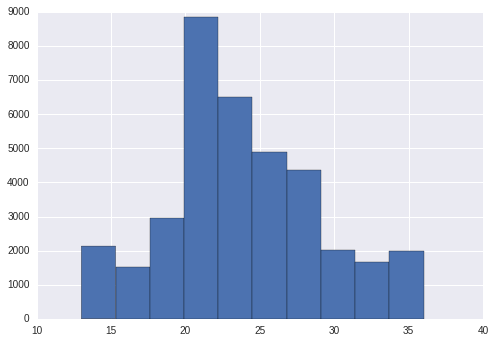

In [18]:
day1_data["mem2"]["Forecast_Hour"].hist()

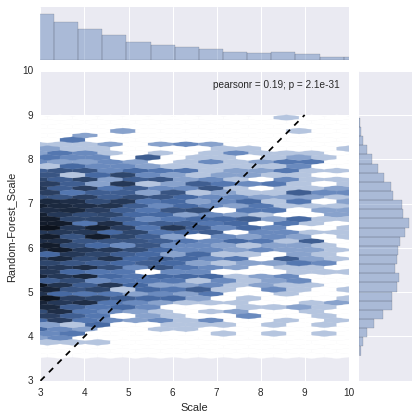

In [9]:
month = pd.DatetimeIndex(day1_data["mem1"]["Date"]).month
g = sns.jointplot(x="Scale", y="Random-Forest_Scale", 
              data=day1_data["mem1"].loc[(day1_data["mem1"]["Scale"] > 0) & (month==6)],
              kind="hex", xlim=(3,10), ylim=(3,10), bins="log")
g.ax_joint.plot(np.arange(3, 10), np.arange(3,10), 'k--')

In [7]:
rocs = []
for mem in members:
    rocs.append(DistributedROC(thresholds=np.arange(0, 1.1, 0.1)))
    rocs[-1].update(day1_data[mem]["Random-Forest_Condition"].values, 
                    np.where(day1_data[mem]["Hail_Size"] > 0, 1, 0))

In [8]:
colors = ["r", "b", "g", "orange", "purple", "cyan", "brown", "yellowgreen", "pink", "navy"]
roc_curve(rocs, [mem + " ({0:0.2f})".format(rocs[m].auc()) for m, mem in enumerate(members)], colors, ["o"] * 10, 
          "roc.png", title="Hail Yes-No NCAR Ensemble 2016")

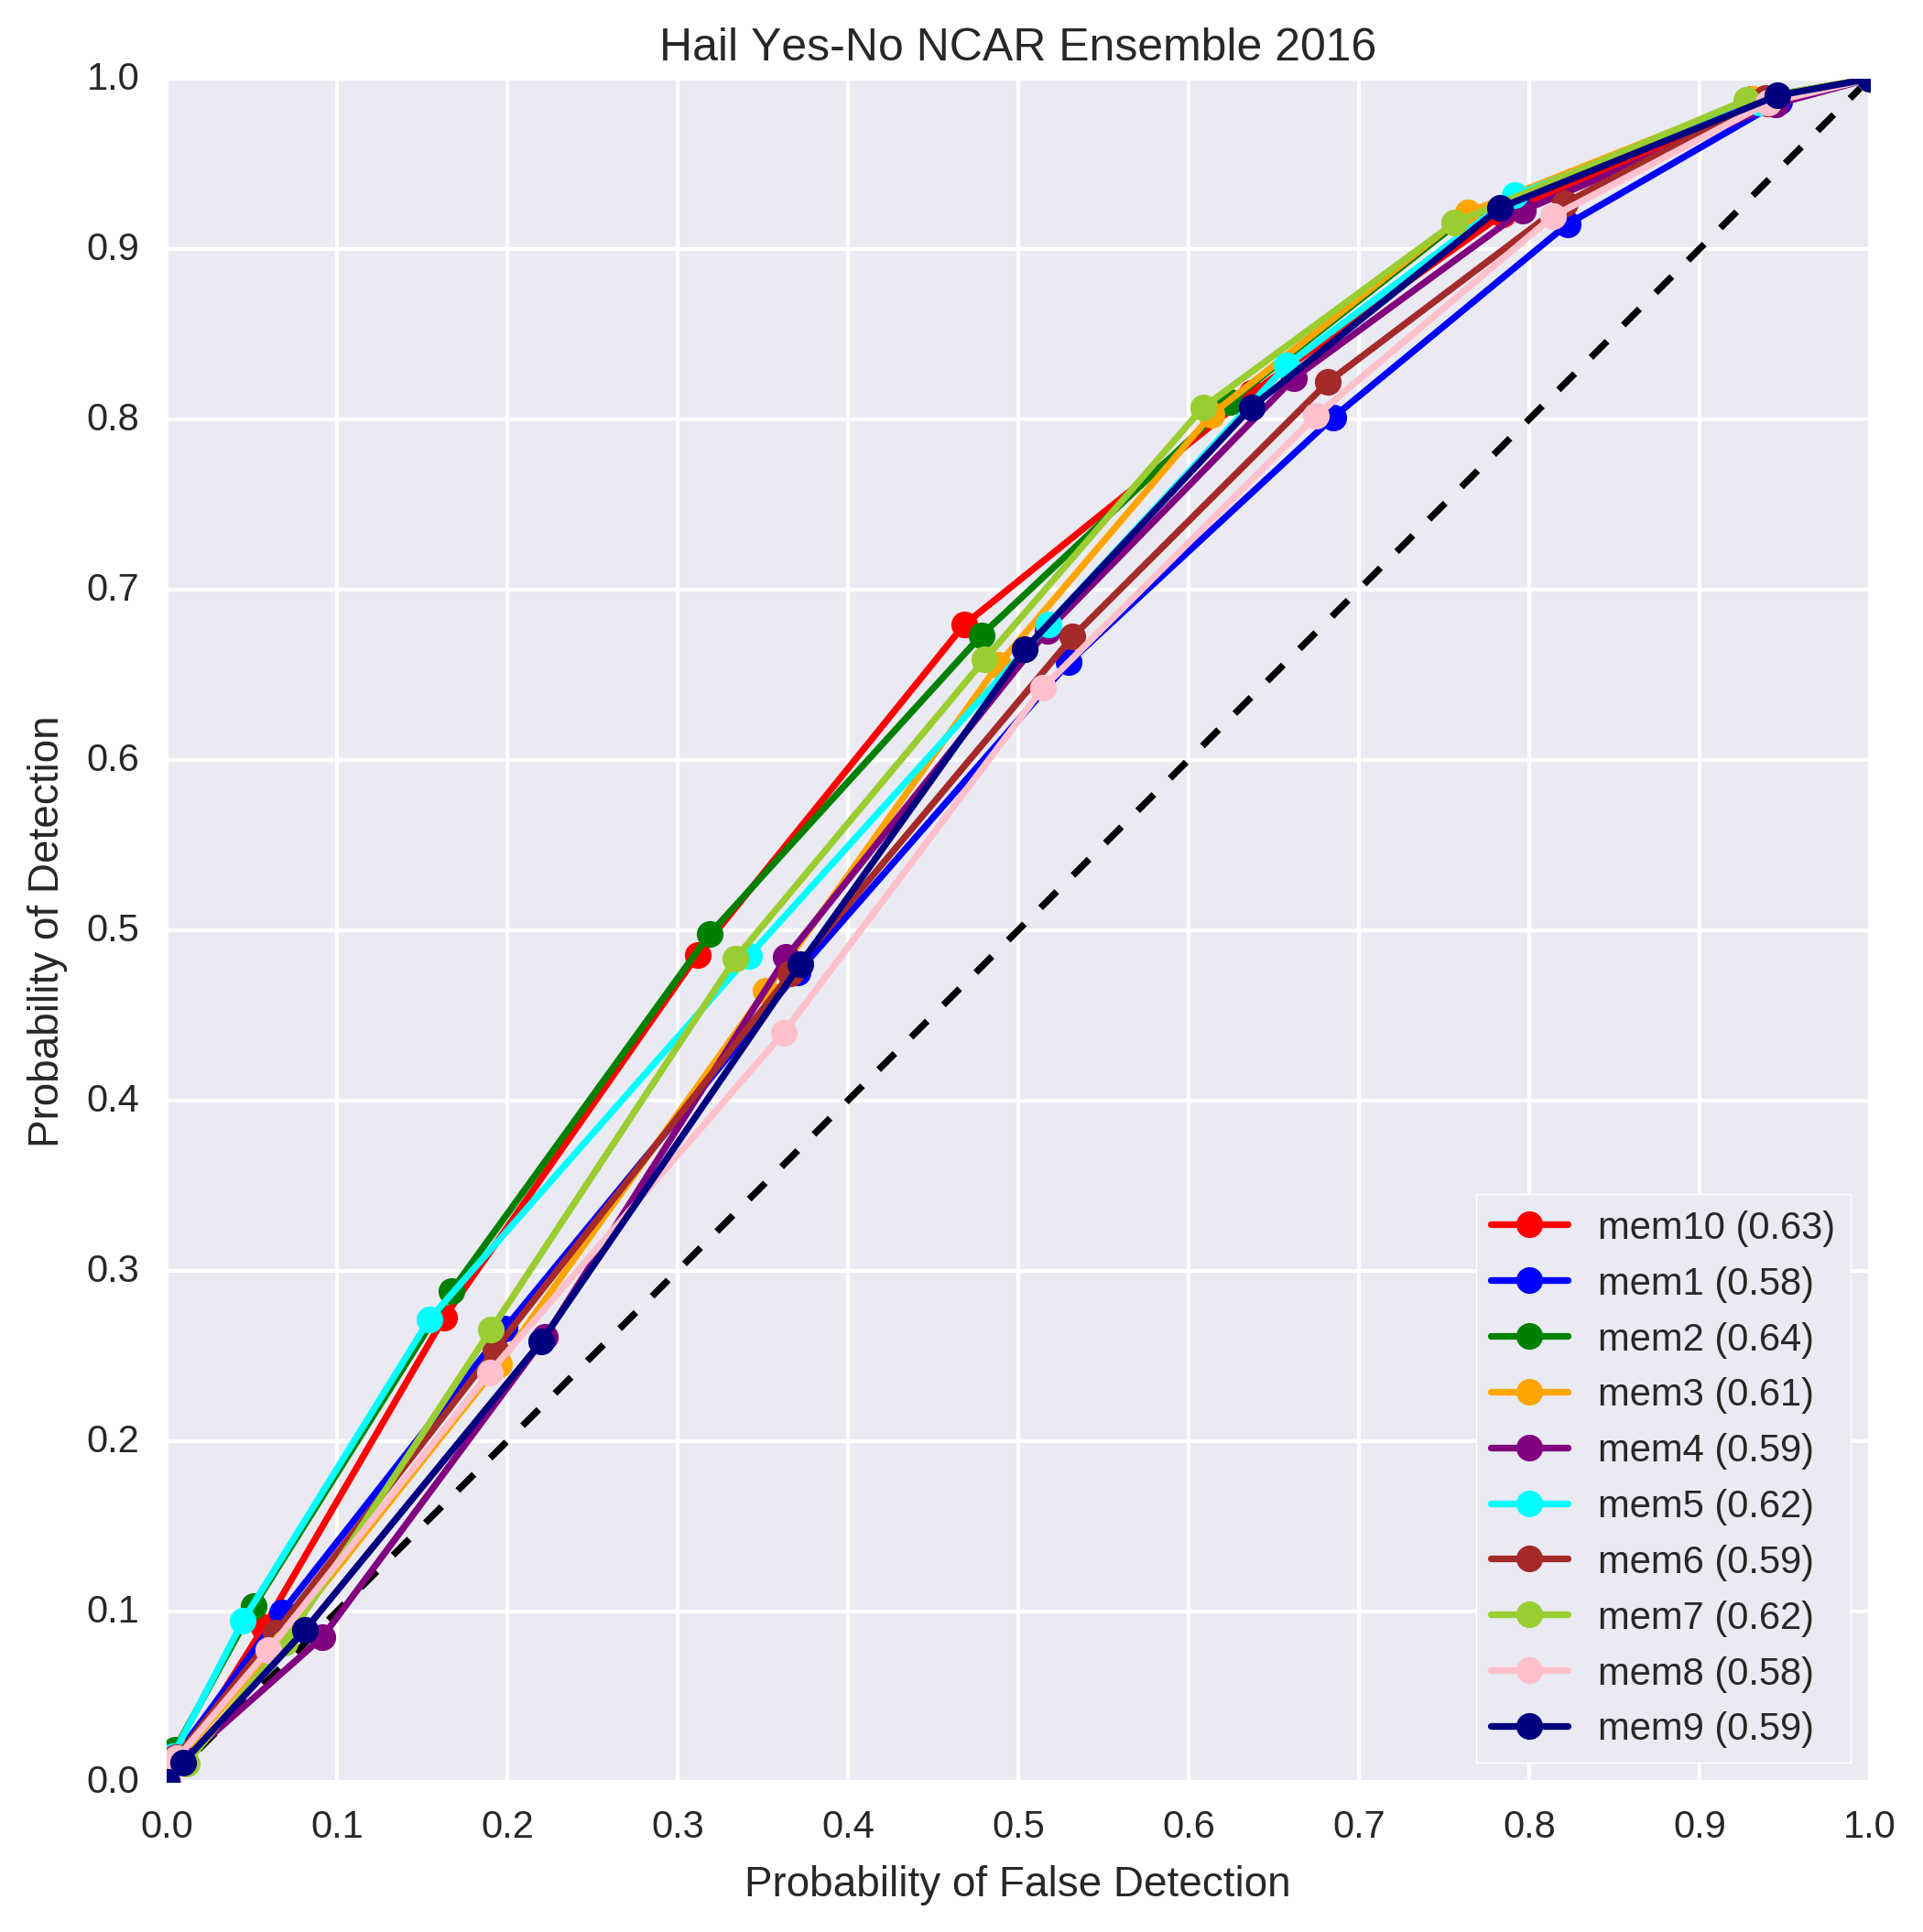

In [9]:
Image("roc.png")

In [10]:
rel = DistributedReliability(np.arange(0, 1.05, 0.05))
rel.update(day1_data["mem1"]["Random-Forest_Condition"].values, np.where(day1_data["mem1"]["Hail_Size"] > 0, 1, 0))

In [11]:
attributes_diagram([rel], ["Random Forest {0:0.2f}".format(rel.brier_skill_score())], ["r"], ["o"], "rel.png")

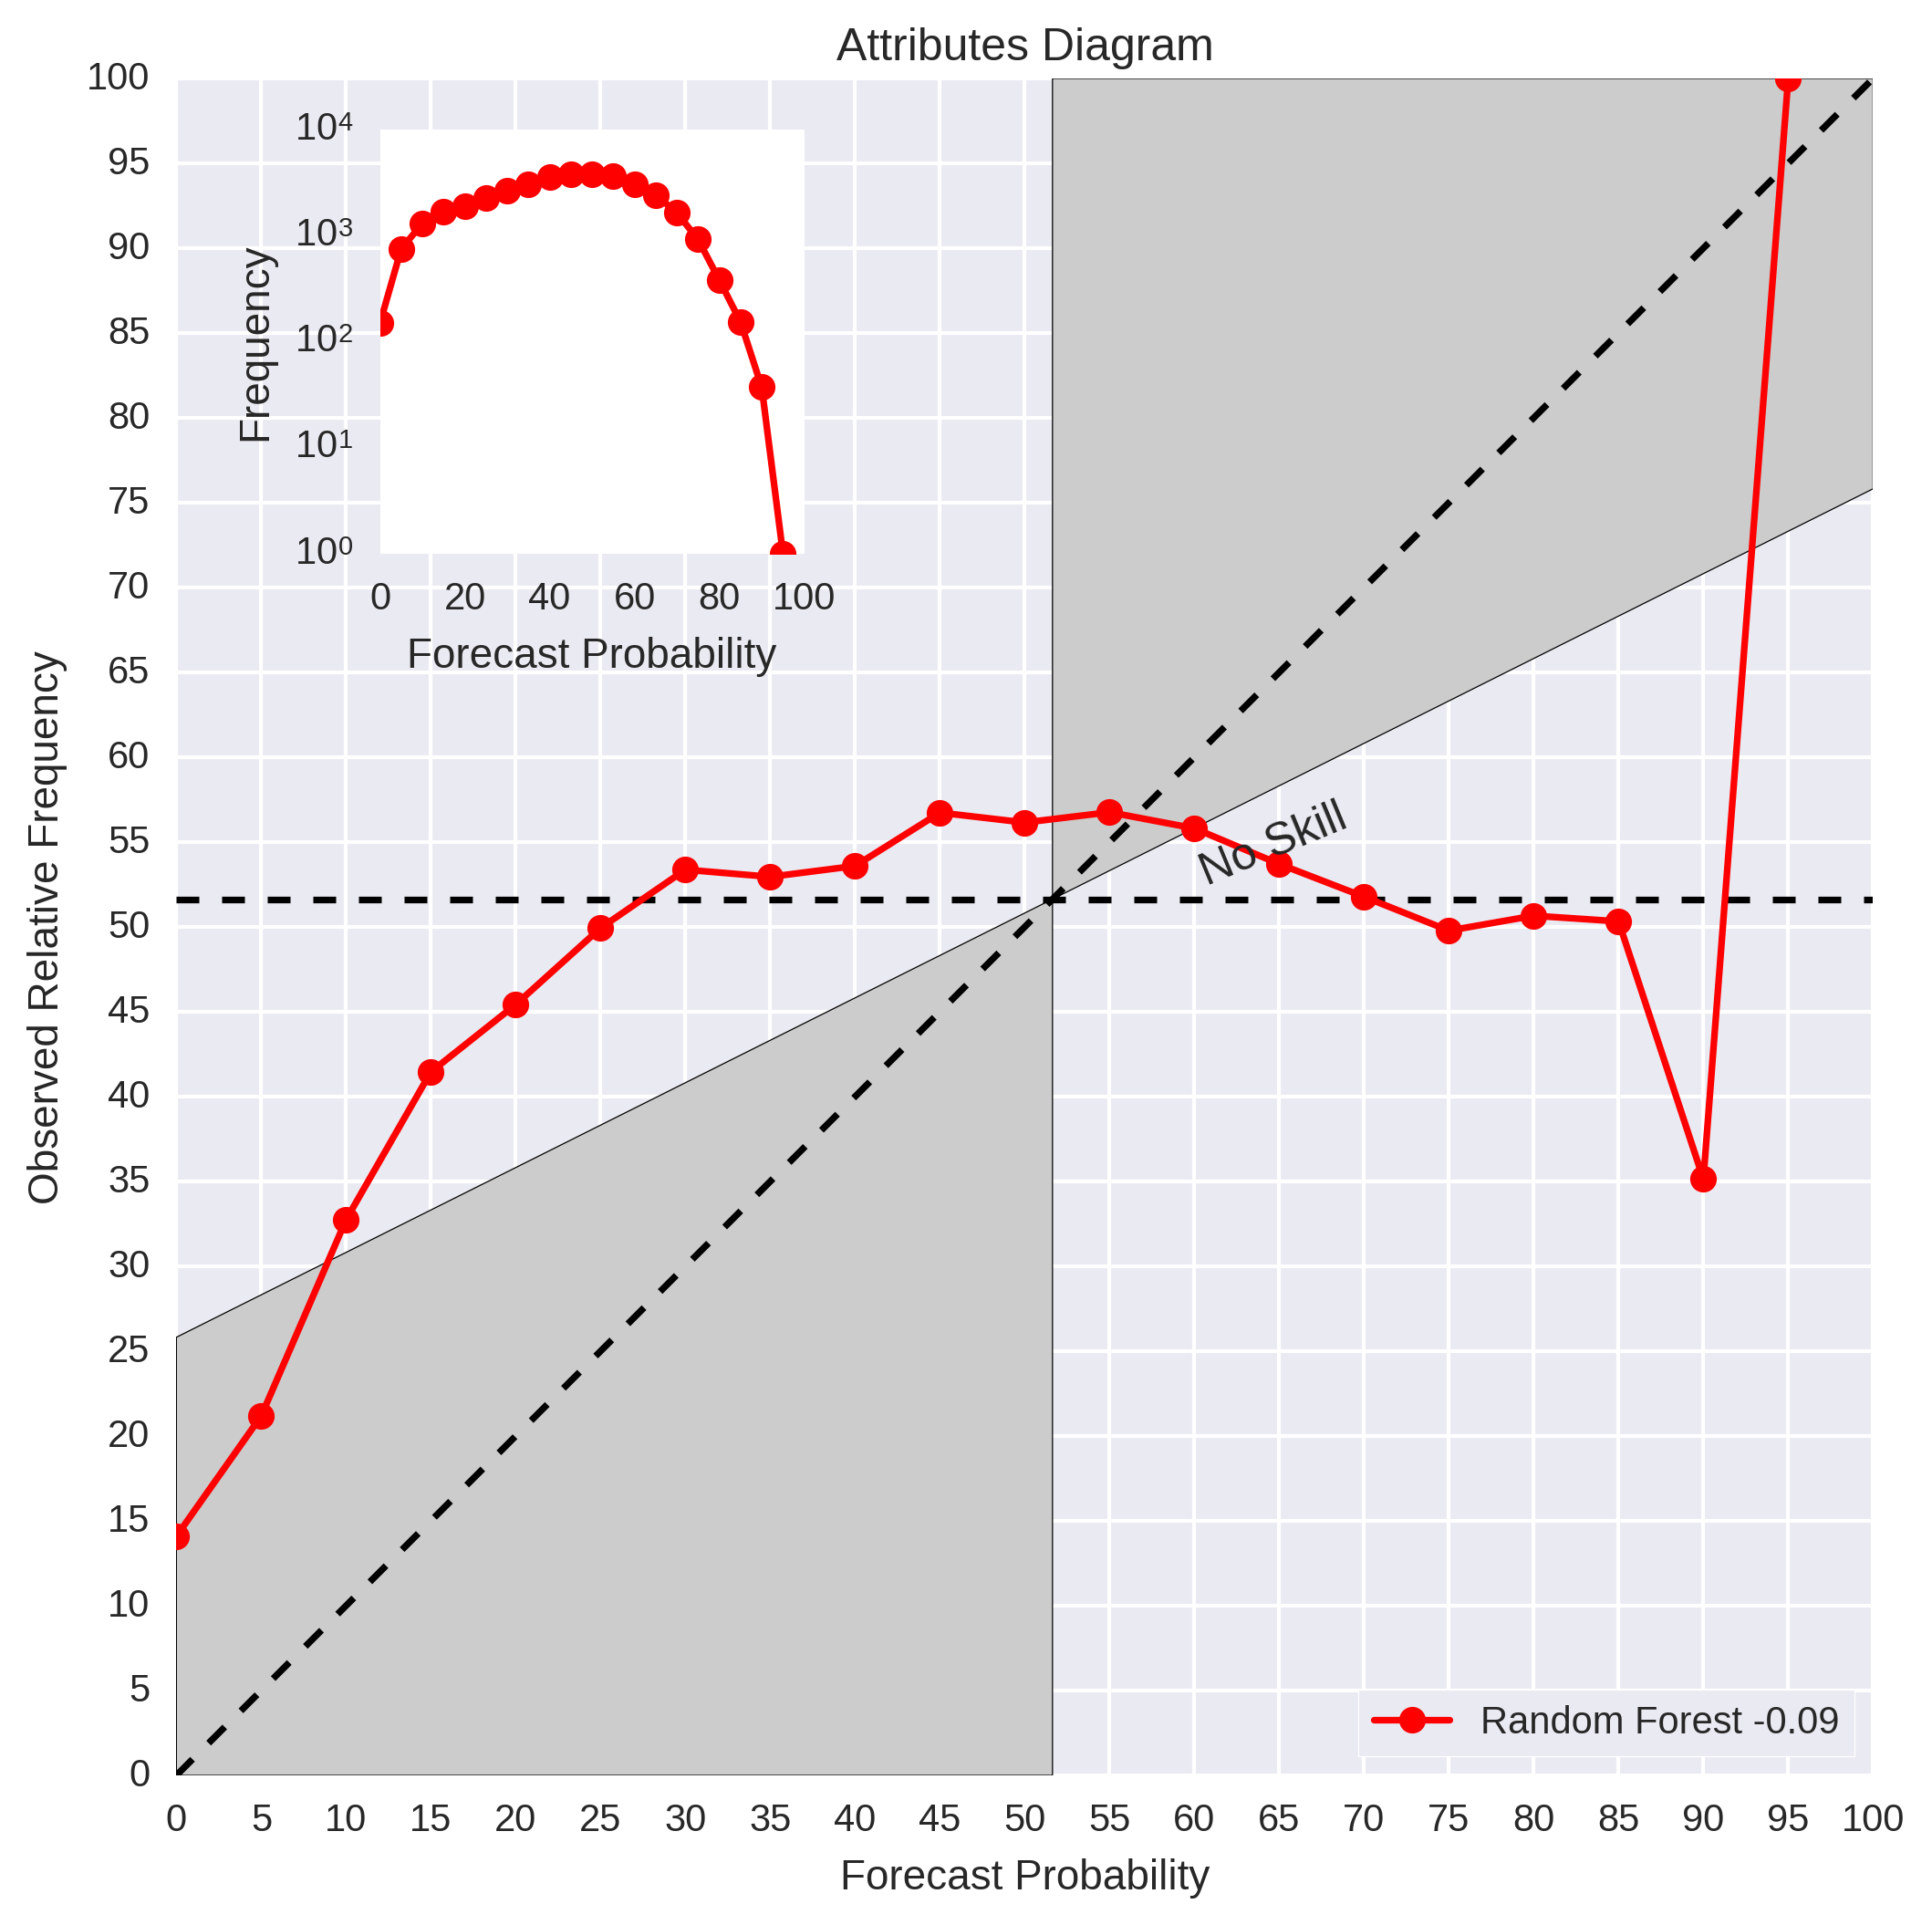

In [12]:
Image("rel.png")

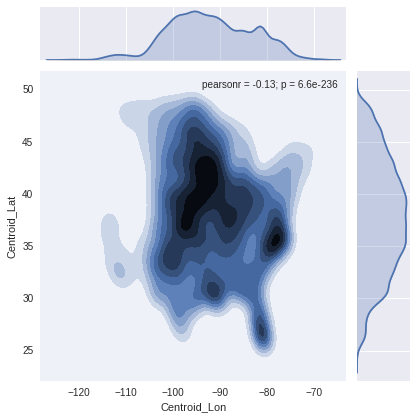

In [4]:
sns.jointplot(merged_data["mem1"]["Centroid_Lon"], merged_data["mem1"]["Centroid_Lat"], kind="kde")

In [6]:
for col in merged_data["mem1"].columns:
    print(col)

Step_ID
Track_ID
Date
Forecast_Hour
Valid_Hour_UTC
Duration
Centroid_Lon
Centroid_Lat
Storm_Motion_U
Storm_Motion_V
UP_HELI_MAX_mean
UP_HELI_MAX_max
UP_HELI_MAX_min
UP_HELI_MAX_std
UP_HELI_MAX_skew
UP_HELI_MAX_percentile_10
UP_HELI_MAX_percentile_50
UP_HELI_MAX_percentile_90
GRPL_MAX_mean
GRPL_MAX_max
GRPL_MAX_min
GRPL_MAX_std
GRPL_MAX_skew
GRPL_MAX_percentile_10
GRPL_MAX_percentile_50
GRPL_MAX_percentile_90
W_UP_MAX_mean
W_UP_MAX_max
W_UP_MAX_min
W_UP_MAX_std
W_UP_MAX_skew
W_UP_MAX_percentile_10
W_UP_MAX_percentile_50
W_UP_MAX_percentile_90
W_DN_MAX_mean
W_DN_MAX_max
W_DN_MAX_min
W_DN_MAX_std
W_DN_MAX_skew
W_DN_MAX_percentile_10
W_DN_MAX_percentile_50
W_DN_MAX_percentile_90
HAIL_MAX2D_mean
HAIL_MAX2D_max
HAIL_MAX2D_min
HAIL_MAX2D_std
HAIL_MAX2D_skew
HAIL_MAX2D_percentile_10
HAIL_MAX2D_percentile_50
HAIL_MAX2D_percentile_90
HAIL_MAXK1_mean
HAIL_MAXK1_max
HAIL_MAXK1_min
HAIL_MAXK1_std
HAIL_MAXK1_skew
HAIL_MAXK1_percentile_10
HAIL_MAXK1_percentile_50
HAIL_MAXK1_percentile_90
LTG3_MAX_mea

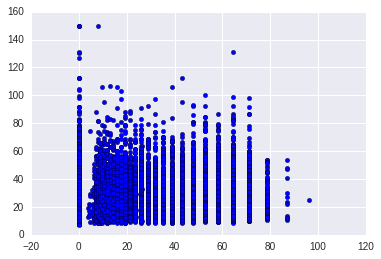

In [18]:
plt.scatter(merged_data["mem1"]["HAIL_MAXK1_max"][merged_data["mem1"]["Hail_Size"] > 0] * 1000, 
            merged_data["mem1"]["Hail_Size"][merged_data["mem1"]["Hail_Size"] > 0])

In [26]:
np.count_nonzero(merged_data["mem1"]["Hail_Size"].values == 0)

31897

In [32]:
total_path = "/glade/scratch/dgagne/track_data_ncar_2016_csv/"
track_total_files = sorted(glob(total_path + "track_total_NCAR_mem1*.csv"))
all_tracks = pd.concat([pd.read_csv(track_total_file) for track_total_file in track_total_files], ignore_index=True)

In [50]:
np.where(~np.isnan(all_tracks["Start_Time_Error"]))

(array([ 2032,  2035,  2037, ..., 80217, 80218, 80219]),)

In [52]:
all_tracks.loc[2035]

Track_ID               mem10_GRPL_MAX_20160501-0000_02_04_004
Start_Date                                2016-05-01 02:00:00
End_Date                                  2016-05-01 04:00:00
Duration                                                    3
Ensemble_Name                                            NCAR
Ensemble_Member                                         mem10
Object_Variable                                      GRPL_MAX
Obs_Track_ID                obs_mem10_20160501-0000_02_03_019
Translation_Error_X                                   10123.7
Translation_Error_Y                                   -8003.2
Start_Time_Error                                            0
End_Time_Error                                              1
Name: 2035, dtype: object

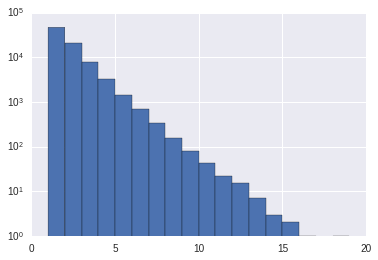

In [57]:
all_tracks["Duration"].hist(bins=np.arange(1, 20))
ax = plt.gca()
ax.set_yscale("log")

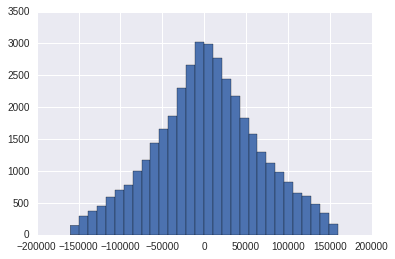

In [63]:
all_tracks["Translation_Error_X"][~np.isnan(all_tracks["Translation_Error_X"])].hist(bins=30)

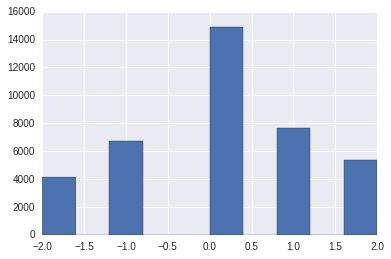

In [65]:
all_tracks["Start_Time_Error"].dropna().hist()

In [71]:
obs_tracks = pd.read_csv("/glade/scratch/dgagne/track_data_ncar_2016_csv/track_step_obs_mem1_20160527.csv")
fore_tracks = pd.read_csv("/glade/scratch/dgagne/track_data_ncar_2016_csv/track_step_NCAR_mem1_20160527.csv")
fore_total_tracks = pd.read_csv("/glade/scratch/dgagne/track_data_ncar_2016_csv/track_total_NCAR_mem1_20160527.csv")

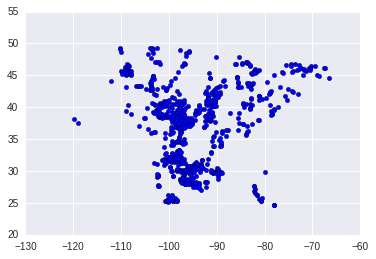

In [68]:
plt.scatter(obs_tracks["Centroid_Lon"], obs_tracks["Centroid_Lat"])

In [72]:
fore_total_tracks

,Track_ID,Start_Date,End_Date,Duration,Ensemble_Name,Ensemble_Member,Object_Variable,Obs_Track_ID,Translation_Error_X,Translation_Error_Y,Start_Time_Error,End_Time_Error
0,mem1_GRPL_MAX_20160527-0000_01_05_000,2016-05-27 01:00:00,2016-05-27 05:00:00,5.0,NCAR,mem1,GRPL_MAX,obs_mem1_20160527-0000_03_03_005,-66576.96176,-63627.38781,-2.0,2.0
1,mem1_GRPL_MAX_20160527-0000_01_02_001,2016-05-27 01:00:00,2016-05-27 02:00:00,2.0,NCAR,mem1,GRPL_MAX,obs_mem1_20160527-0000_03_04_019,75894.39846,95580.41612,-2.0,-2.0
2,mem1_GRPL_MAX_20160527-0000_01_03_002,2016-05-27 01:00:00,2016-05-27 03:00:00,3.0,NCAR,mem1,GRPL_MAX,None,NaN,NaN,NaN,NaN
3,mem1_GRPL_MAX_20160527-0000_01_04_003,2016-05-27 01:00:00,2016-05-27 04:00:00,4.0,NCAR,mem1,GRPL_MAX,obs_mem1_20160527-0000_03_03_022,101105.17741,45964.39057,-2.0,1.0
4,mem1_GRPL_MAX_20160527-0000_01_03_004,2016-05-27 01:00:00,2016-05-27 03:00:00,3.0,NCAR,mem1,GRPL_MAX,obs_mem1_20160527-0000_03_03_025,34528.81023,35472.64677,-2.0,0.0
5,mem1_GRPL_MAX_20160527-0000_01_01_005,2016-05-27 01:00:00,2016-05-27 01:00:00,1.0,NCAR,mem1,GRPL_MAX,None,NaN,NaN,NaN,NaN
6,mem1_GRPL_MAX_20160527-0000_01_01_006,2016-05-27 01:00:00,2016-05-27 01:00:00,1.0,NCAR,mem1,GRPL_MAX,obs_mem1_20160527-0000_03_03_021,86733.57572,133844.57716,-2.0,-2.0
7,mem1_GRPL_MAX_20160527-0000_01_01_007,2016-05-27 01:00:00,2016-05-27 01:00:00,1.0,NCAR,mem1,GRPL_MAX,None,NaN,NaN,NaN,NaN
8,mem1_GRPL_MAX_20160527-0000_01_01_008,2016-05-27 01:00:00,2016-05-27 01:00:00,1.0,NCAR,mem1,GRPL_MAX,None,NaN,NaN,NaN,NaN
9,mem1_GRPL_MAX_20160527-0000_01_02_009,2016-05-27 01:00:00,2016-05-27 02:00:00,2.0,NCAR,mem1,GRPL_MAX,None,NaN,NaN,NaN,NaN


In [85]:
start = lambda x: x.values[-1]
obs_track_mean = obs_tracks.groupby("Obs_Track_ID")["Centroid_Lon", "Centroid_Lat"].agg(np.mean)

In [89]:
obs_tracks["Obs_Track_ID"].unique()

array(['obs_mem1_20160527-0000_03_04_000',
       'obs_mem1_20160527-0000_03_04_001',
       'obs_mem1_20160527-0000_03_04_002',
       'obs_mem1_20160527-0000_03_04_003',
       'obs_mem1_20160527-0000_03_04_004',
       'obs_mem1_20160527-0000_03_03_005',
       'obs_mem1_20160527-0000_03_04_006',
       'obs_mem1_20160527-0000_03_03_007',
       'obs_mem1_20160527-0000_03_04_008',
       'obs_mem1_20160527-0000_03_03_009',
       'obs_mem1_20160527-0000_03_03_010',
       'obs_mem1_20160527-0000_03_03_011',
       'obs_mem1_20160527-0000_03_03_012',
       'obs_mem1_20160527-0000_03_03_013',
       'obs_mem1_20160527-0000_03_03_014',
       'obs_mem1_20160527-0000_03_03_015',
       'obs_mem1_20160527-0000_03_03_016',
       'obs_mem1_20160527-0000_03_03_017',
       'obs_mem1_20160527-0000_03_03_018',
       'obs_mem1_20160527-0000_03_04_019',
       'obs_mem1_20160527-0000_03_04_020',
       'obs_mem1_20160527-0000_03_03_021',
       'obs_mem1_20160527-0000_03_03_022',
       'obs

In [100]:
fore_tracks_combo = pd.merge(fore_tracks, fore_total_tracks, on="Track_ID")

In [112]:
mean_fore_tracks = fore_tracks.groupby("Track_ID")["Centroid_Lon", "Centroid_Lat"].agg(np.mean)
mean_fore_tracks = pd.merge(mean_fore_tracks, fore_total_tracks.loc[:, ["Track_ID", "Obs_Track_ID"]], left_index=True, right_on="Track_ID")

In [119]:
matched_tracks = pd.merge(mean_fore_tracks, obs_track_mean, left_on="Obs_Track_ID", right_index=True)

In [121]:
all_xs = []
all_ys = []
for r in matched_tracks.index:
    all_xs.extend([matched_tracks.loc[r, "Centroid_Lon_x"], matched_tracks.loc[r, "Centroid_Lon_y"], np.nan])
    all_ys.extend([matched_tracks.loc[r, "Centroid_Lat_x"], matched_tracks.loc[r, "Centroid_Lat_y"], np.nan])

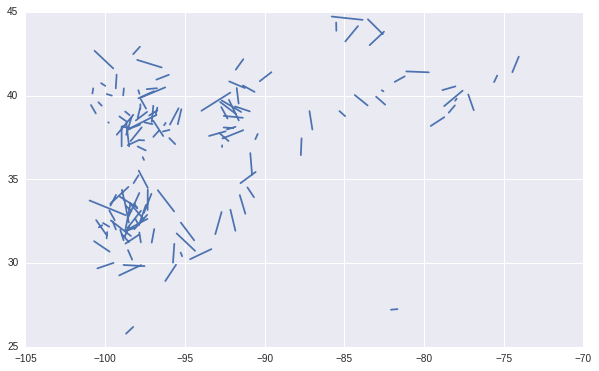

In [123]:
plt.figure(figsize=(10, 6))
plt.plot(all_xs, all_ys)

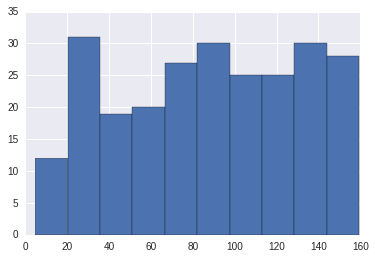

In [129]:
(np.sqrt(fore_tracks_combo["Translation_Error_X"] ** 2 + fore_tracks_combo["Translation_Error_Y"] ** 2) / 1000.0).hist()

In [139]:
unique_ids = fore_total_tracks["Obs_Track_ID"][fore_total_tracks["Obs_Track_ID"] != "None"].unique()
counts = np.zeros(unique_ids.size)
for u, unique_id in enumerate(unique_ids):
    counts[u] = np.count_nonzero(fore_total_tracks["Obs_Track_ID"] == unique_id)

In [141]:
unique_ids.size

139

<IPython.core.display.Javascript object>


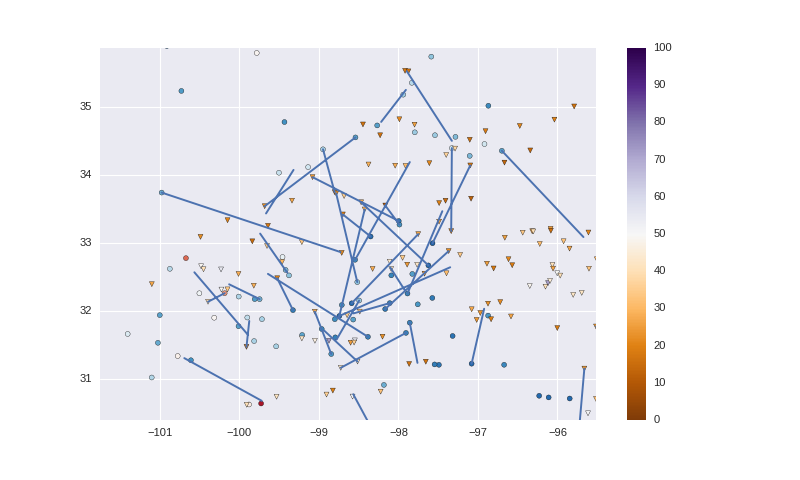

In [163]:
%matplotlib notebook
plt.figure(figsize=(10, 6))
rank = np.argsort(obs_tracks["MESH_max"])
plt.plot(all_xs, all_ys)
plt.scatter(obs_tracks["Centroid_Lon"][rank], obs_tracks["Centroid_Lat"][rank], 20, obs_tracks["MESH_max"][rank], 
            vmin=0, vmax=100, cmap="RdBu_r")
plt.scatter(fore_tracks["Centroid_Lon"], fore_tracks["Centroid_Lat"], 20, fore_tracks["GRPL_MAX_max"],
           vmin=0, vmax=100, cmap="PuOr", marker="v")

plt.colorbar()


In [161]:
fore_tracks["GRPL_MAX_max"].max()

86.159480000000002

In [162]:
fore_tracks

,Step_ID,Track_ID,Date,Forecast_Hour,Valid_Hour_UTC,Duration,Centroid_Lon,Centroid_Lat,Storm_Motion_U,Storm_Motion_V,...,area,eccentricity,major_axis_length,minor_axis_length,orientation,extent,Hail_Size,Shape,Location,Scale
0,mem1_GRPL_MAX_20160527-0000_01_05_000_00,mem1_GRPL_MAX_20160527-0000_01_05_000,2016-05-27 01:00:00,1.0,1.0,1.0,-99.21527,31.59660,0.0,0.0,...,110.0,0.88891,18.28700,8.37683,-1.40204,0.57895,30.59961,2.59706,10.69980,3.87013
1,mem1_GRPL_MAX_20160527-0000_01_05_000_01,mem1_GRPL_MAX_20160527-0000_01_05_000,2016-05-27 02:00:00,2.0,2.0,2.0,-99.05071,31.56254,12000.0,-9000.0,...,100.0,0.44884,12.10537,10.81751,-1.51213,0.75758,30.59961,2.59706,10.69980,3.87013
2,mem1_GRPL_MAX_20160527-0000_01_05_000_02,mem1_GRPL_MAX_20160527-0000_01_05_000,2016-05-27 03:00:00,3.0,3.0,3.0,-98.87413,31.56188,15000.0,3000.0,...,100.0,0.85077,15.61798,8.20772,-0.20634,0.74074,30.59961,2.59706,10.69980,3.87013
3,mem1_GRPL_MAX_20160527-0000_01_05_000_03,mem1_GRPL_MAX_20160527-0000_01_05_000,2016-05-27 04:00:00,4.0,4.0,4.0,-98.54853,31.56781,24000.0,-3000.0,...,104.0,0.69788,13.70257,9.81402,0.17651,0.74286,30.59961,2.59706,10.69980,3.87013
4,mem1_GRPL_MAX_20160527-0000_01_05_000_04,mem1_GRPL_MAX_20160527-0000_01_05_000,2016-05-27 05:00:00,5.0,5.0,5.0,-98.20070,31.62222,30000.0,-12000.0,...,48.0,0.85685,10.99169,5.66686,-0.40062,0.68571,30.59961,2.59706,10.69980,3.87013
5,mem1_GRPL_MAX_20160527-0000_01_02_001_00,mem1_GRPL_MAX_20160527-0000_01_02_001,2016-05-27 01:00:00,1.0,1.0,1.0,-97.69281,37.99284,0.0,0.0,...,125.0,0.90977,22.40276,9.29991,-0.25733,0.49603,21.20020,1.87947,6.10020,3.09356
6,mem1_GRPL_MAX_20160527-0000_01_02_001_01,mem1_GRPL_MAX_20160527-0000_01_02_001,2016-05-27 02:00:00,2.0,2.0,2.0,-97.72353,38.21926,15000.0,18000.0,...,103.0,0.82217,15.41318,8.77384,-0.36955,0.64375,23.20020,1.31535,7.19980,5.72950
7,mem1_GRPL_MAX_20160527-0000_01_03_002_00,mem1_GRPL_MAX_20160527-0000_01_03_002,2016-05-27 01:00:00,1.0,1.0,1.0,-95.90031,38.34011,0.0,0.0,...,108.0,0.82333,15.68649,8.90307,-1.05426,0.70130,0.00000,0.00000,0.00000,0.00000
8,mem1_GRPL_MAX_20160527-0000_01_03_002_01,mem1_GRPL_MAX_20160527-0000_01_03_002,2016-05-27 02:00:00,2.0,2.0,2.0,-95.58897,38.47417,24000.0,24000.0,...,110.0,0.83456,17.90456,9.86383,-0.36224,0.57292,0.00000,0.00000,0.00000,0.00000
9,mem1_GRPL_MAX_20160527-0000_01_03_002_02,mem1_GRPL_MAX_20160527-0000_01_03_002,2016-05-27 03:00:00,3.0,3.0,3.0,-96.04503,38.48583,-24000.0,0.0,...,99.0,0.83412,15.21310,8.39136,-0.86738,0.58580,0.00000,0.00000,0.00000,0.00000


In [4]:
ls /glade/p/work/dgagne/ncar_coarse_neighbor_eval_2016/

coarse_neighbor_eval_NCAR_20160502.csv  coarse_neighbor_eval_NCAR_20160701.csv
coarse_neighbor_eval_NCAR_20160503.csv  coarse_neighbor_eval_NCAR_20160702.csv
coarse_neighbor_eval_NCAR_20160504.csv  coarse_neighbor_eval_NCAR_20160703.csv
coarse_neighbor_eval_NCAR_20160505.csv  coarse_neighbor_eval_NCAR_20160704.csv
coarse_neighbor_eval_NCAR_20160506.csv  coarse_neighbor_eval_NCAR_20160705.csv
coarse_neighbor_eval_NCAR_20160507.csv  coarse_neighbor_eval_NCAR_20160706.csv
coarse_neighbor_eval_NCAR_20160508.csv  coarse_neighbor_eval_NCAR_20160707.csv
coarse_neighbor_eval_NCAR_20160509.csv  coarse_neighbor_eval_NCAR_20160708.csv
coarse_neighbor_eval_NCAR_20160510.csv  coarse_neighbor_eval_NCAR_20160709.csv
coarse_neighbor_eval_NCAR_20160511.csv  coarse_neighbor_eval_NCAR_20160710.csv
coarse_neighbor_eval_NCAR_20160512.csv  coarse_neighbor_eval_NCAR_20160711.csv
coarse_neighbor_eval_NCAR_20160513.csv  coarse_neighbor_eval_NCAR_20160712.csv
coarse_neighbor_eval_NCAR_20160514.csv  coarse_neigh

In [6]:
eval_data = pd.read_csv("/glade/p/work/dgagne/ncar_coarse_neighbor_eval_2016/coarse_neighbor_eval_NCAR_20160526.csv")

In [10]:
for c in eval_data.columns:
    print(c)

i
i_small
j
j_small
lat
lon
us_mask
x
y
Run_Date
Start_Date
End_Date
MESH_Max_60min_00.50_25
MESH_Max_60min_00.50_50
MESH_Max_60min_00.50_75
NCAR_HAIL_MAX2D_mem1_5
NCAR_HAIL_MAX2D_mem1_20
NCAR_HAIL_MAX2D_mem1_25
NCAR_HAIL_MAX2D_mem1_30
NCAR_HAIL_MAX2D_mem1_35
NCAR_HAIL_MAX2D_mem1_40
NCAR_HAIL_MAX2D_mem1_45
NCAR_HAIL_MAX2D_mem1_50
NCAR_HAIL_MAX2D_mem1_75
NCAR_HAIL_MAX2D_mem2_5
NCAR_HAIL_MAX2D_mem2_20
NCAR_HAIL_MAX2D_mem2_25
NCAR_HAIL_MAX2D_mem2_30
NCAR_HAIL_MAX2D_mem2_35
NCAR_HAIL_MAX2D_mem2_40
NCAR_HAIL_MAX2D_mem2_45
NCAR_HAIL_MAX2D_mem2_50
NCAR_HAIL_MAX2D_mem2_75
NCAR_HAIL_MAX2D_mem3_5
NCAR_HAIL_MAX2D_mem3_20
NCAR_HAIL_MAX2D_mem3_25
NCAR_HAIL_MAX2D_mem3_30
NCAR_HAIL_MAX2D_mem3_35
NCAR_HAIL_MAX2D_mem3_40
NCAR_HAIL_MAX2D_mem3_45
NCAR_HAIL_MAX2D_mem3_50
NCAR_HAIL_MAX2D_mem3_75
NCAR_HAIL_MAX2D_mem4_5
NCAR_HAIL_MAX2D_mem4_20
NCAR_HAIL_MAX2D_mem4_25
NCAR_HAIL_MAX2D_mem4_30
NCAR_HAIL_MAX2D_mem4_35
NCAR_HAIL_MAX2D_mem4_40
NCAR_HAIL_MAX2D_mem4_45
NCAR_HAIL_MAX2D_mem4_50
NCAR_HAIL_MAX2D_mem4_75

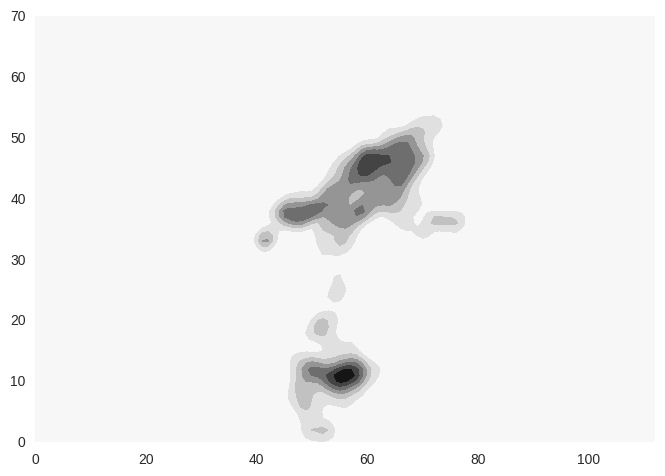

In [26]:
plt.contourf(eval_data["NCAR_UP_HELI_MAX_mean_150"].values.reshape((71, 113)))

In [20]:
eval_data.j_small.max()

112

In [32]:
d = Dataset("/glade/scratch/dgagne/RT2016/2016052600/mem1_surrogate_2016052600.nc")
hail_max = d.variables["HAIL_MAXK1"][:]

In [34]:
hail_max.max() * 1000

86.87271922826767

In [38]:
model_output = ModelOutput("NCAR", "mem1", datetime(2016, 5, 26), "HAIL_MAXK1", 
                          datetime(2016, 5, 26) + timedelta(hours=13), datetime(2016,5,26) + timedelta(hours=36),
                          "/glade/scratch/dgagne/RT2016/", single_step=False)
model_output.load_data()

In [42]:
model_output.units

u'm'